# MATH 507 HW2
### Paul Zhang
## 0. Preperation

In [1]:
from hw2 import *
import matplotlib
import sys

In [2]:
print("Env info\nPython={}\nnumpy={}\npandas={}\nmatplotlib={}\nscipy={}\nyfinance={}".format(sys.version, \
        np.__version__, pd.__version__, matplotlib.__version__, scipy.__version__, yf.__version__))

Env info
Python=3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
numpy=1.26.4
pandas=2.2.2
matplotlib=3.9.2
scipy=1.13.1
yfinance=0.2.44


Additionally, let's get rid of the Future Warning from pandas. It's an eye sore.

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Part (a)
- DPP formula:
\begin{align*}
    V(t, w) &= \sup_\alpha \mathbb{E}[V(t + 1, w(1 + \alpha R_{t+1}))] \\
    V(T, w) &= \frac{w^\zeta}{\zeta}
\end{align*}
- Problem simplification:
Ansatz: $V(t, w) = C(t)w^\zeta$ with $C(T) = \frac{1}{\zeta}$. Therefore,
$$ C(t)w^\zeta = C(t + 1) w^\zeta\sup_\alpha \mathbb{E}[1 + \alpha R_{t + 1}] $$
and we only need to maximize 
$$ \mathbb{E}[1 + \alpha R_{t + 1}] $$
which is a function of $\alpha, \mu$ and $\epsilon$.

In [4]:
dt = yf.download(tickers = "^GSPC", start = "2014-01-01", end = "2022-01-01")
hyper_params = {"rf": .01, "zeta": -3, "N": 1000, "T": 100, "lambda_": .02, "grid": (-1, 2.5, 200)}
strategy = DynamicStrategy(price_data = dt["Adj Close"], log_returns = False, **hyper_params)
strategy.backtest()

[*********************100%***********************]  1 of 1 completed

Alphas for each trading window:             riskless     risky
2017-12-21  1.276077 -0.276077
2018-05-17  1.165146 -0.165146
2018-10-09  1.388794 -0.388794
2019-03-06  0.976730  0.023270
2019-07-29  1.157158 -0.157158
2019-12-18  1.422607 -0.422607
2020-05-13  0.710388  0.289612
2020-10-05  1.006081 -0.006081
2021-03-01  1.061935 -0.061935
2021-07-22  1.316803 -0.316803
2021-12-13  1.288414 -0.288414
Annualized mean, std dev and Sharpe Ratio: 
                           mu     sigma    Sharpe
2018-05-16 00:00:00 -0.001783  0.049077 -0.240093
2018-10-08 00:00:00 -0.014696  0.013195 -1.871645
2019-03-05 00:00:00  0.004245  0.080470 -0.071518
2019-07-26 00:00:00  0.015604  0.002526  2.218332
2019-12-17 00:00:00 -0.013068  0.021432 -1.076338
2020-05-12 00:00:00  0.081512  0.209316  0.341646
2020-10-02 00:00:00  0.131659  0.059098  2.058596
2021-02-26 00:00:00  0.008035  0.000956 -2.054735
2021-07-21 00:00:00 -0.008627  0.007570 -2.460683
2021-12-10 00:00:00 -0.042338  0.038179 -1.370856
20

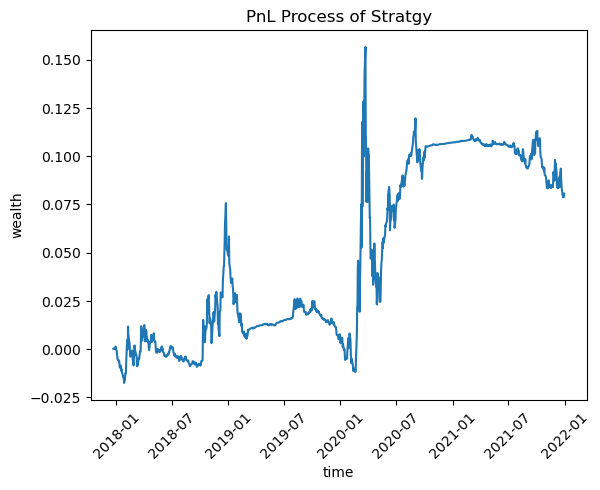

In [5]:
strategy.plot_pnl()

## Part (b)

Performance of adjusted wealth process:                   mu     sigma    Sharpe
2021-12-31  0.009751  0.077287 -0.003222


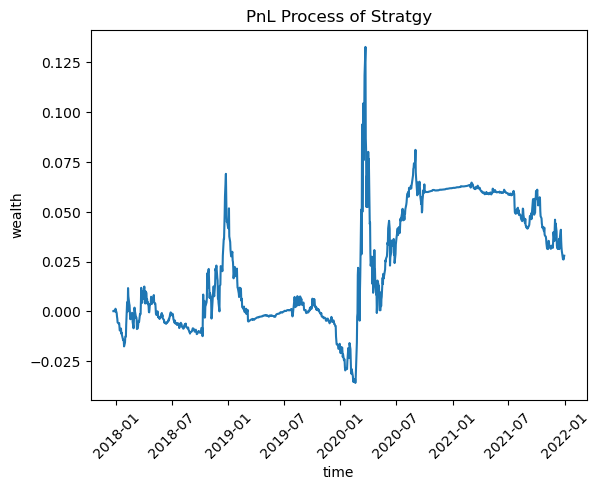

In [6]:
strategy_tc = DynamicStrategyTC(price_data = dt["Adj Close"], log_returns = False, **hyper_params)
adj_pnl = strategy_tc.adjust_pnl()
strategy_tc.plot_pnl(adj_pnl)

## Part (c)
The model is given by
\begin{align*}
    V(t, a) &= \sup_{\alpha} \mathbb{E}\left[(1+\alpha(\mu+\epsilon)-\lambda|\alpha - a|)^\zeta \cdot V\left(t+1, \frac{\alpha(1+\mu+\epsilon)}{1 + (1-\alpha)r_f + \alpha(\mu+\epsilon)}\right)\right] \\
    V(T, a) &= \frac{1}{\zeta}
\end{align*}

In [7]:
strategy_tc.backtest_tc()

Annualized mean, std dev and Sharpe Ratio: 
               mu     sigma    Sharpe
0        0.033837  0.156188  0.152616
0        0.135218  0.070154  1.784902
0        0.007831  0.207221 -0.010467
0        0.245252  0.108628  2.165674
0        0.154679  0.136372  1.060915
0       -0.208830  0.504677 -0.433603
0        0.473187  0.205685  2.251924
0        0.391589  0.161296  2.365763
0        0.314067  0.122211  2.488060
0        0.150926  0.121521  1.159682
0        0.601198  0.164528  3.593294
overall  0.156314  0.212350  0.689021


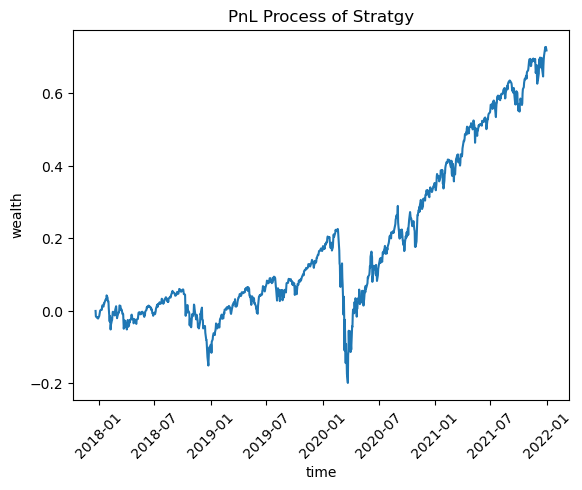

In [8]:
strategy_tc.plot_pnl()